In [1]:
import nibabel as nib 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from skimage.metrics import mean_squared_error as mse
from scipy.spatial.distance import jensenshannon
import pandas as pd
from tqdm import tqdm
from math import log10
from scipy.stats import entropy
from scipy.interpolate import make_interp_spline
from scipy.stats import rankdata
from ridgeplot import ridgeplot
import ptitprince as pt
from scipy.stats import wilcoxon, ranksums, mannwhitneyu
from statannotations.Annotator import Annotator

In [2]:
#Show the emphysema distribution for the best epoch on the validation data
b30f_ref = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/soft/emphysema_masked/emph.csv")
b30f_ref = b30f_ref.sort_values(by = "pid")
b50f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/hard/emphysema_masked/emph.csv")
b50f = b50f.sort_values(by = "pid")
bone = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/hard/emphysema/emph.csv")
bone = bone.sort_values(by = "pid")
bone_std = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/soft/emphysema/emph.csv")
bone_std = bone_std.sort_values(by = "pid")


b30f_ref['Kernel'] = 'B30f (reference)'
b50f['Kernel'] = 'B50f'
bone['Kernel'] = 'BONE'
bone_std['Kernel'] = 'STANDARD'

bonetob30f_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/BONEtoB30f_emphysema/emph.csv")
bonetob30f_cycgan = bonetob30f_cycgan.sort_values(by = "pid")
stdtob30f_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/STDtoB30f_emphysema/emph.csv")
stdtob30f_cycgan = stdtob30f_cycgan.sort_values(by = "pid")
b50ftob30f_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_cycgan = b50ftob30f_cycgan.sort_values(by = "pid")
bonetostd_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/BONEtoSTD_emphysema/emph.csv")
bonetostd_cycgan = bonetostd_cycgan.sort_values(by = "pid")

bonetob30f_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/BONEtoB30f_emphysema/emph.csv")
bonetob30f_switchgan = bonetob30f_switchgan.sort_values(by = "pid")
stdtob30f_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/STDtoB30f_emphysema/emph.csv")
stdtob30f_switchgan = stdtob30f_switchgan.sort_values(by = "pid")
b50ftob30f_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_switchgan = b50ftob30f_switchgan.sort_values(by = "pid")
bonetostd_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/BONEtoSTD_emphysema/emph.csv")
bonetostd_switchgan = bonetostd_switchgan.sort_values(by = "pid")


bonetob30f_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/BONEtoB30f_emphysema/emph.csv")
bonetob30f_multipath = bonetob30f_multipath.sort_values(by = "pid")
stdtob30f_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/STDtoB30f_emphysema/emph.csv")
stdtob30f_multipath = stdtob30f_multipath.sort_values(by = "pid")
b50ftob30f_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_multipath = b50ftob30f_multipath.sort_values(by = "pid")
bonetostd_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/BONEtoSTD_emphysema/emph.csv")
bonetostd_multipath = bonetostd_multipath.sort_values(by = "pid")

bonetob30f_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoB30f_emphysema/emph.csv")
bonetob30f_multipathanatomy = bonetob30f_multipathanatomy.sort_values(by = "pid")
stdtob30f_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/STDtoB30f_emphysema/emph.csv")
stdtob30f_multipathanatomy = stdtob30f_multipathanatomy.sort_values(by = "pid")
b50ftob30f_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_multipathanatomy = b50ftob30f_multipathanatomy.sort_values(by = "pid")
bonetostd_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoSTD_emphysema/emph.csv")
bonetostd_multipathanatomy = bonetostd_multipathanatomy.sort_values(by = "pid")


bonetob30f_cycgan['Kernel'] = 'BONEtoB30f'
stdtob30f_cycgan['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_cycgan['Kernel'] = 'B50ftoB30f'

bonetob30f_switchgan['Kernel'] = 'BONEtoB30f'
stdtob30f_switchgan['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_switchgan['Kernel'] = 'B50ftoB30f'

bonetob30f_multipath['Kernel'] = 'BONEtoB30f'
stdtob30f_multipath['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_multipath['Kernel'] = 'B50ftoB30f'

bonetob30f_multipathanatomy['Kernel'] = 'BONEtoB30f'
stdtob30f_multipathanatomy['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_multipathanatomy['Kernel'] = 'B50ftoB30f'


emph_before = pd.concat([b30f_ref, b50f, bone, bone_std])
emph_after_multipathanatomy = pd.concat([b30f_ref, b50ftob30f_multipathanatomy,bonetob30f_multipathanatomy,stdtob30f_multipathanatomy])
emph_after_multipath = pd.concat([b30f_ref, b50ftob30f_multipath,bonetob30f_multipath,stdtob30f_multipath])
emph_after_cyclegan = pd.concat([b30f_ref, b50ftob30f_cycgan, bonetob30f_cycgan, stdtob30f_cycgan])
emph_after_switchgan = pd.concat([b30f_ref, b50ftob30f_switchgan, bonetob30f_switchgan, stdtob30f_switchgan])

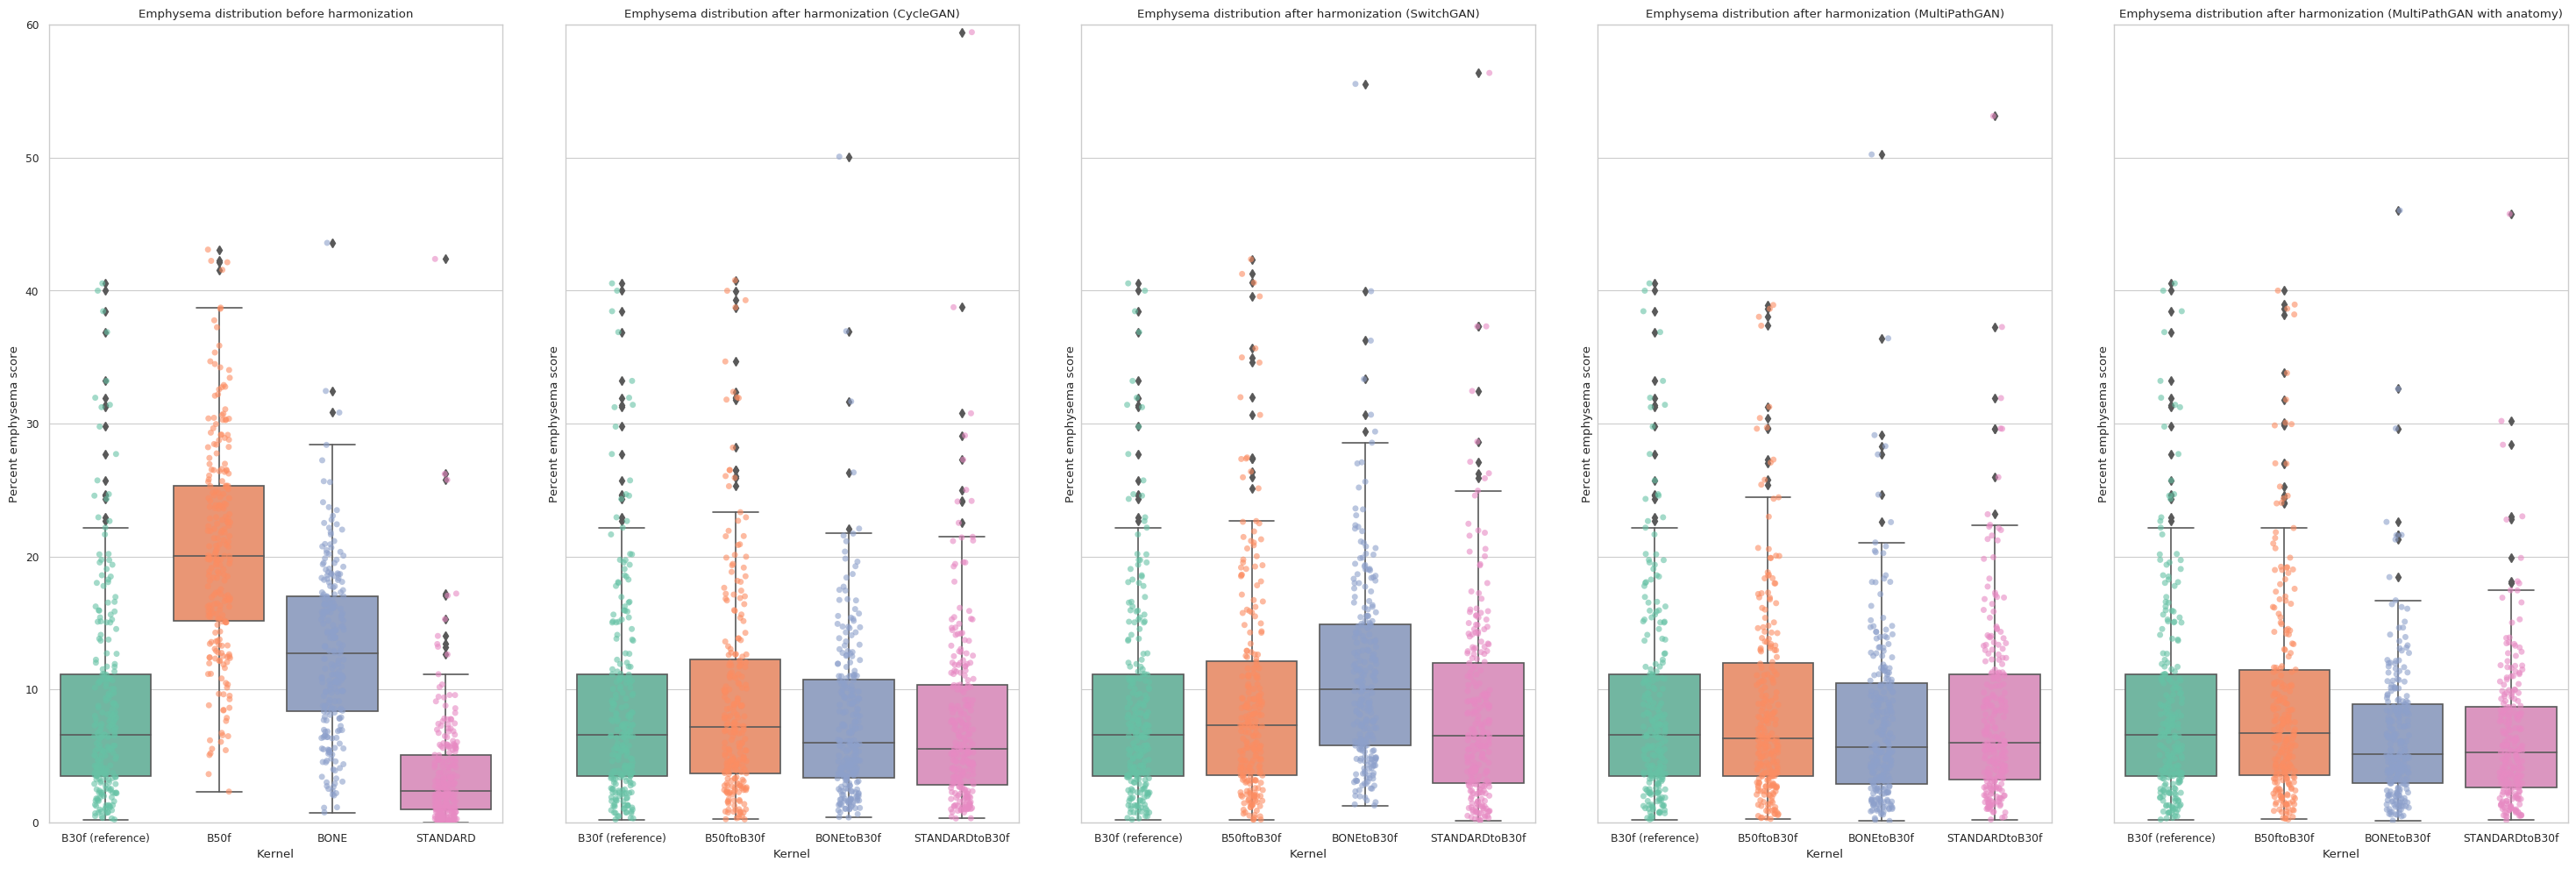

In [7]:
np.random.seed(42)

# Set the theme, context, and style
sns.set_theme()
sns.set_context("paper")
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 5, figsize=(30, 10), sharey=True)

# Make a violinplot for the emphysema distribution before harmonization
sns.boxplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set2")
sns.stripplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set2", dodge=True, alpha=0.6)
ax[0].set_title("Emphysema distribution before harmonization")
ax[0].set_ylim(0, 60)
ax[0].set_ylabel("Percent emphysema score")

# Make a violinplot for the emphysema distribution after harmonization (CycleGAN)
sns.boxplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set2")
sns.stripplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set2", dodge=True, alpha=0.6)
ax[1].set_title("Emphysema distribution after harmonization (CycleGAN)")
ax[1].set_ylim(0, 60)
ax[1].set_ylabel("Percent emphysema score")


# Make a violinplot for the emphysema distribution after harmonization (SwitchGAN)
sns.boxplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set2")
sns.stripplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set2", dodge=True, alpha=0.6)
ax[2].set_title("Emphysema distribution after harmonization (SwitchGAN)")
ax[2].set_ylim(0, 60)
ax[2].set_ylabel("Percent emphysema score")


sns.boxplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set2")
sns.stripplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set2", dodge=True, alpha=0.6)
ax[3].set_title("Emphysema distribution after harmonization (MultiPathGAN)")
ax[3].set_ylim(0, 60)
ax[3].set_ylabel("Percent emphysema score")

sns.boxplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set2")
sns.stripplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set2", dodge=True, alpha=0.6)
ax[4].set_title("Emphysema distribution after harmonization (MultiPathGAN with anatomy)")
ax[4].set_ylim(0, 60)
ax[4].set_ylabel("Percent emphysema score")

# Adjust the layout to prevent overlap
plt.tight_layout()

In [9]:
#Mann whitney u test
print("CycleGAN")
print(mannwhitneyu(bonetob30f_cycgan['emph_score'], b30f_ref['emph_score']))
print(mannwhitneyu(stdtob30f_cycgan['emph_score'], b30f_ref['emph_score']))
print(mannwhitneyu(b50ftob30f_cycgan['emph_score'], b30f_ref['emph_score']))

print("SwitchGAN")
print(mannwhitneyu(bonetob30f_switchgan['emph_score'], b30f_ref['emph_score']))
print(mannwhitneyu(stdtob30f_switchgan['emph_score'], b30f_ref['emph_score']))
print(mannwhitneyu(b50ftob30f_switchgan['emph_score'], b30f_ref['emph_score']))

print("MultiPathGAN")
print(mannwhitneyu(bonetob30f_multipath['emph_score'], b30f_ref['emph_score']))
print(mannwhitneyu(stdtob30f_multipath['emph_score'], b30f_ref['emph_score']))
print(mannwhitneyu(b50ftob30f_multipath['emph_score'], b30f_ref['emph_score']))

print("MultiPathGAN with anatomy")
print(mannwhitneyu(bonetob30f_multipathanatomy['emph_score'], b30f_ref['emph_score']))
print(mannwhitneyu(stdtob30f_multipathanatomy['emph_score'], b30f_ref['emph_score']))
print(mannwhitneyu(b50ftob30f_multipathanatomy['emph_score'], b30f_ref['emph_score']))

CycleGAN
MannwhitneyuResult(statistic=27497.0, pvalue=0.39133173107891717)
MannwhitneyuResult(statistic=26393.0, pvalue=0.11324557305013584)
MannwhitneyuResult(statistic=30170.0, pvalue=0.36742937582138147)
SwitchGAN
MannwhitneyuResult(statistic=36391.0, pvalue=5.868959527965526e-07)
MannwhitneyuResult(statistic=27992.0, pvalue=0.5951180336660606)
MannwhitneyuResult(statistic=30126.0, pvalue=0.3830220587165555)
MultiPathGAN
MannwhitneyuResult(statistic=26661.0, pvalue=0.1593102028135287)
MannwhitneyuResult(statistic=27860.0, pvalue=0.5363734911494551)
MannwhitneyuResult(statistic=28765.0, pvalue=0.9818854026154951)
MultiPathGAN with anatomy
MannwhitneyuResult(statistic=24839.0, pvalue=0.009147421622621282)
MannwhitneyuResult(statistic=23886.0, pvalue=0.0012220386879993413)
MannwhitneyuResult(statistic=29182.0, pvalue=0.8017570563813922)


In [12]:
def bland_altman_conversion_without_mean(ax, hard, soft, converted_multipath, converted_cyclegan, x_plot_range, y_plot_range, title):
    sd_limit = 1.96
    annotation_font_size = 16

    scatter_kwds = {'s': 20}
    mean_line_kwds = {}
    limit_lines_kwds = {}
    for kwds in [mean_line_kwds, limit_lines_kwds]:
        if 'linewidth' not in kwds:
            kwds['linewidth'] = 2

    diff_list_before = np.array(hard) - np.array(soft)
    mean_diff_before = np.mean(diff_list_before)
    std_diff_before = np.std(diff_list_before)

    diff_list_after_multi = np.array(converted_multipath) - np.array(soft)
    mean_diff_after_multi = np.mean(diff_list_after_multi)
    std_diff_after_multi = np.std(diff_list_after_multi) 

    diff_list_after_cyclegan = np.array(converted_cyclegan) - np.array(soft)
    mean_diff_after_cyclegan = np.mean(diff_list_after_cyclegan)
    std_diff_after_cyclegan = np.std(diff_list_after_cyclegan)
    
    ax.set_title(f"Agreement before and after kernel harmonization: {title}", fontsize=16)

    ax.scatter(np.array(soft), diff_list_before, color='blue', s=10, alpha=0.5)
    ax.scatter(np.array(soft), diff_list_after_multi, color='orange', s=10, alpha=0.4)
    ax.scatter(np.array(soft), diff_list_after_cyclegan, color='green', s=10, alpha=0.3)

    ax.set_ylim(y_plot_range[0], y_plot_range[1])
    ax.set_xlim(x_plot_range[0], x_plot_range[1])

    limit_of_agreement_before = sd_limit * std_diff_before
    lower_before = mean_diff_before - limit_of_agreement_before
    upper_before = mean_diff_before + limit_of_agreement_before 

    limit_of_agreement_after_multi = sd_limit * std_diff_after_multi
    lower_after_multi = mean_diff_after_multi - limit_of_agreement_after_multi
    upper_after_multi = mean_diff_after_multi + limit_of_agreement_after_multi 

    limit_of_agreement_after_cyclegan = sd_limit * std_diff_after_cyclegan
    lower_after_cyclegan = mean_diff_after_cyclegan - limit_of_agreement_after_cyclegan
    upper_after_cyclegan = mean_diff_after_cyclegan + limit_of_agreement_after_cyclegan 

    ax.axhline(lower_before, linestyle='dotted', label=f'Before Conversion: -1.96 SD = {np.round(lower_before, 2)}',
               color='blue', alpha=0.5, **limit_lines_kwds)
    ax.axhline(upper_before, linestyle='dashed', label=f'Before Conversion: +1.96 SD = {np.round(upper_before, 2)}',
               color='blue', alpha=0.5, **limit_lines_kwds)
    ax.axhline(mean_diff_before, linestyle='solid', color='blue',
               label=f'Before Conversion: Mean Difference = {np.round(mean_diff_before, 2)}', alpha=0.5, **mean_line_kwds)
    
    ax.axhline(lower_after_multi, linestyle='dotted', label=f'After Conversion: -1.96 SD = {np.round(lower_after_multi, 2)}',
               color='orange', alpha=0.5, **limit_lines_kwds)
    ax.axhline(upper_after_multi, linestyle='dashed', label=f'After Conversion: +1.96 SD = {np.round(upper_after_multi, 2)}',
               color='orange', alpha=0.5, **limit_lines_kwds)
    ax.axhline(mean_diff_after_multi, linestyle='solid', color='orange',
               label=f'After Conversion: Mean Difference = {np.round(mean_diff_after_multi, 2)}', alpha=0.5, **mean_line_kwds)
    
    ax.axhline(lower_after_cyclegan, linestyle='dotted', label=f'After Conversion: -1.96 SD = {np.round(lower_after_cyclegan, 2)}',
               color='green', alpha=0.5, **limit_lines_kwds)
    ax.axhline(upper_after_cyclegan, linestyle='dashed', label=f'After Conversion: +1.96 SD = {np.round(upper_after_cyclegan, 2)}',
               color='green', alpha=0.5, **limit_lines_kwds)
    ax.axhline(mean_diff_after_cyclegan, linestyle='solid', color='green',
               label=f'After Conversion: Mean Difference = {np.round(mean_diff_after_cyclegan, 2)}', alpha=0.5, **mean_line_kwds)

    ax.set_ylabel("Difference between measures of emphysema", fontsize=annotation_font_size)
    ax.set_xlabel("Ground truth emphysema measurement", fontsize=annotation_font_size)
    ax.tick_params(axis='x', labelsize=annotation_font_size)
    ax.tick_params(axis='y', labelsize=annotation_font_size)

    ax.legend(loc='best', fontsize=int(round(0.9 * annotation_font_size)))

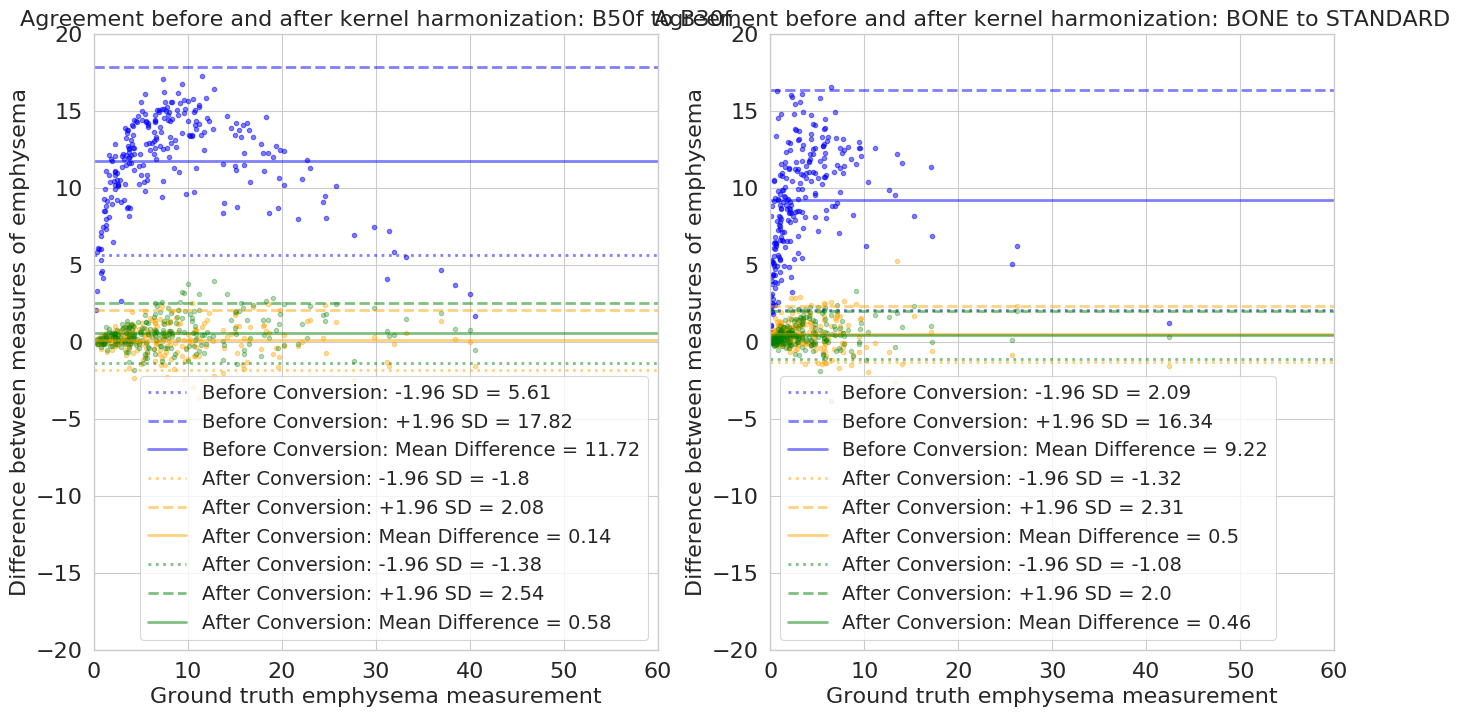

In [13]:
#CycleGAN vs MultipathGANAnatomy
sns.set_context("paper", font_scale=1.5)
fig, axes = plt.subplots(1,2, figsize=(16, 8))
bland_altman_conversion_without_mean(axes[0], b50f['emph_score'], b30f_ref['emph_score'], b50ftob30f_multipathanatomy['emph_score'], b50ftob30f_cycgan['emph_score'], (0, 60), (-20, 20), "B50f to B30f")
bland_altman_conversion_without_mean(axes[1], bone['emph_score'], bone_std['emph_score'], bonetostd_multipathanatomy['emph_score'], bonetostd_cycgan['emph_score'], (0, 60), (-20, 20), "BONE to STANDARD")

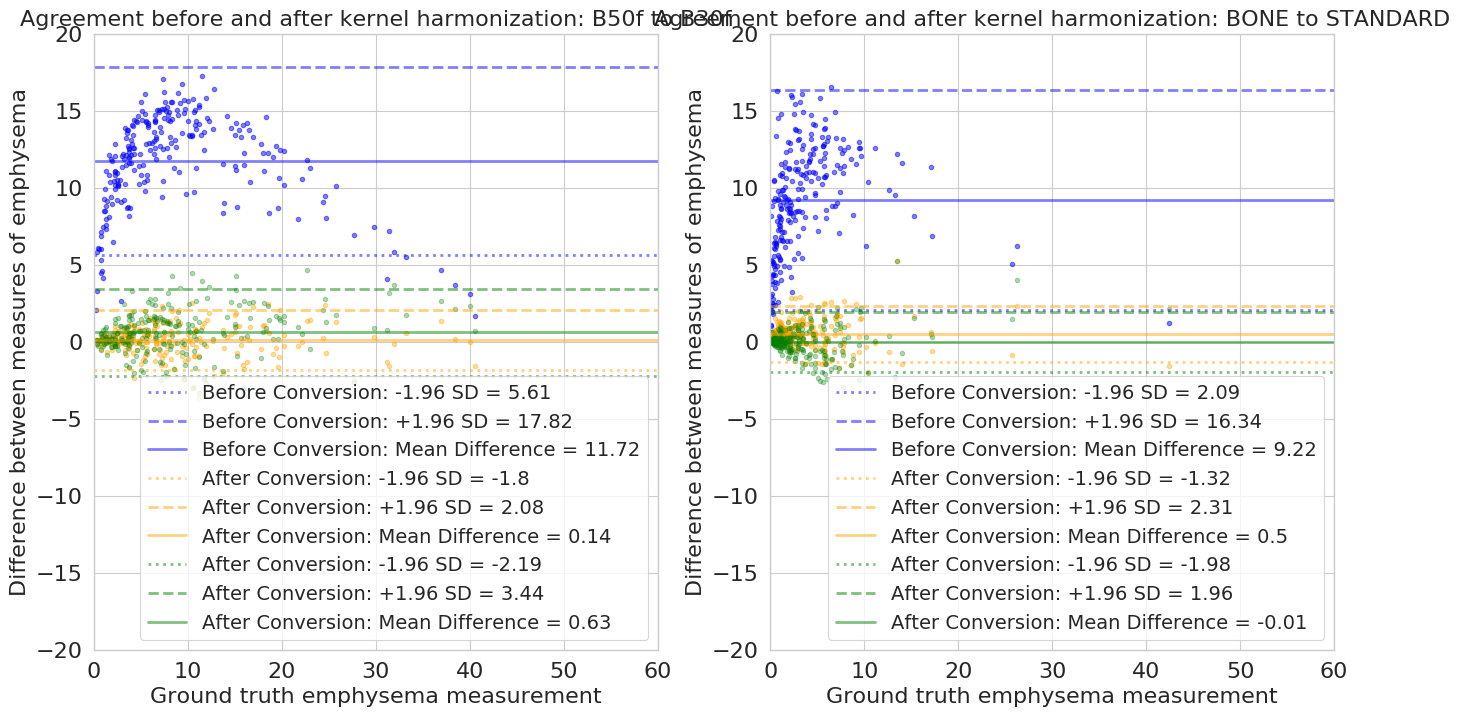

In [14]:
#siwtchgan vs multipathgananatomy
sns.set_context("paper", font_scale=1.5)
fig, axes = plt.subplots(1,2, figsize=(16, 8))
bland_altman_conversion_without_mean(axes[0], b50f['emph_score'], b30f_ref['emph_score'], b50ftob30f_multipathanatomy['emph_score'], b50ftob30f_switchgan['emph_score'], (0, 60), (-20, 20), "B50f to B30f")
bland_altman_conversion_without_mean(axes[1], bone['emph_score'], bone_std['emph_score'], bonetostd_multipathanatomy['emph_score'], bonetostd_switchgan['emph_score'], (0, 60), (-20, 20), "BONE to STANDARD")

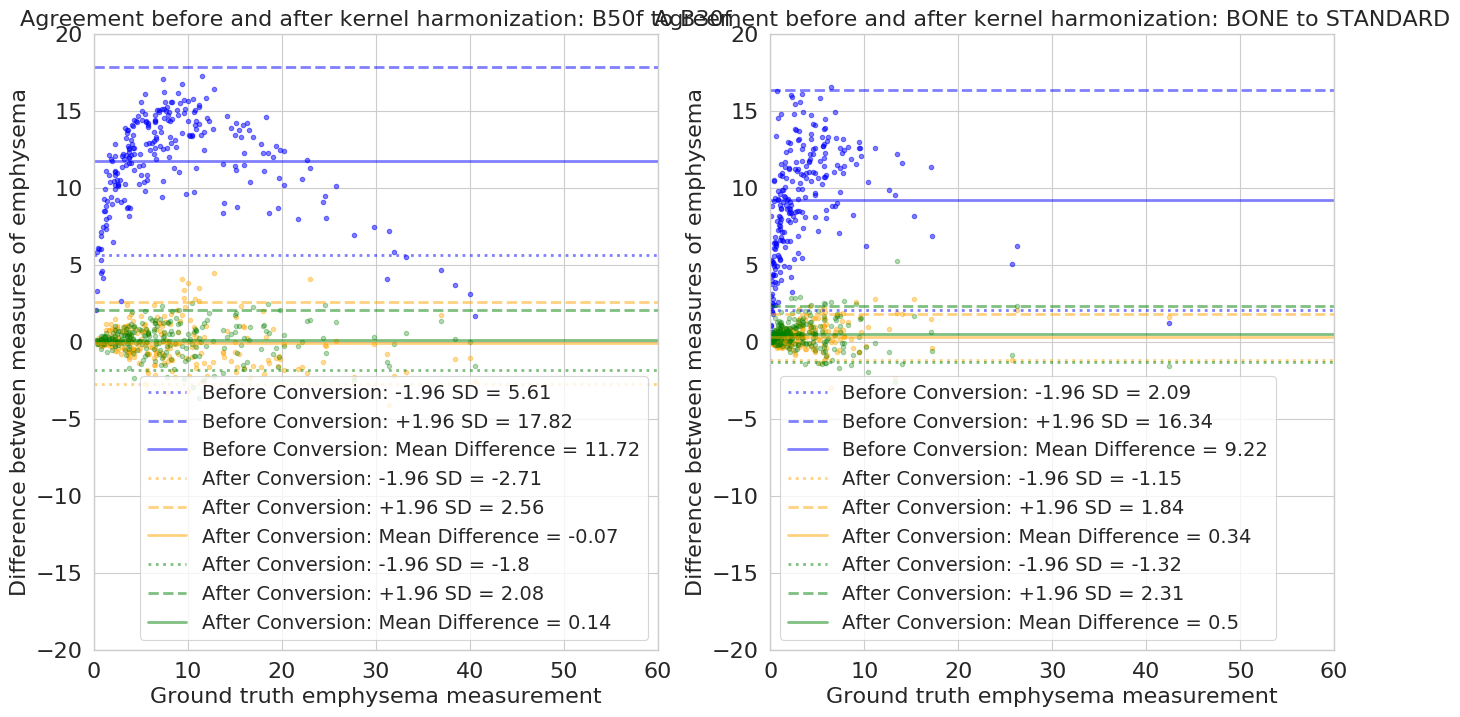

In [15]:
#Multipath vs multipath with anatomy
sns.set_context("paper", font_scale=1.5)
fig, axes = plt.subplots(1,2, figsize=(16, 8))
bland_altman_conversion_without_mean(axes[0], b50f['emph_score'], b30f_ref['emph_score'], b50ftob30f_multipath['emph_score'], b50ftob30f_multipathanatomy['emph_score'], (0, 60), (-20, 20), "B50f to B30f")
bland_altman_conversion_without_mean(axes[1], bone['emph_score'], bone_std['emph_score'], bonetostd_multipath['emph_score'], bonetostd_multipathanatomy['emph_score'], (0, 60), (-20, 20), "BONE to STANDARD")

In [16]:
bonetob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/bonetob30f_finalresults.csv")
stdtob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/stdtob30f_finalresults.csv")

bonetob30f_multipathwithanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoB30f.csv")
stdtob30f_multipathwithanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/STDtoB30f.csv")


In [18]:
merged_bonetob30f = pd.merge(bonetob30f, bonetob30f_multipathwithanatomy, on = "Patient")
merged_bonetob30f

,Patient,Dice_Multipath_Muscle,Dice_CycleGAN_Muscle,Dice_SwitchGAN_Muscle,Dice_Multipath_Fat,Dice_CycleGAN_Fat,Dice_SwitchGAN_Fat,Dice_Multipath_with_anatomy_context_Muscle,Dice_Multipath_with_anatomy_Fat
0,100440,0.884353,0.843899,0.880525,0.902171,0.871793,0.921342,0.887027,0.922333
1,100451,0.839028,0.783649,0.838057,0.843664,0.832552,0.885929,0.839990,0.882262
2,100458,0.914961,0.863485,0.901328,0.893848,0.822811,0.905566,0.912487,0.898564
3,100494,0.921148,0.882155,0.915230,0.856360,0.780997,0.892609,0.922817,0.888144
4,100496,0.893866,0.844765,0.881131,0.872911,0.821802,0.891983,0.890502,0.883422
...,...,...,...,...,...,...,...,...,...
235,217724,0.807316,0.787504,0.833921,0.827024,0.805821,0.867883,0.834902,0.864780
236,217753,0.900882,0.852394,0.881101,0.931500,0.899730,0.933981,0.896938,0.939462
237,218149,0.848376,0.805856,0.865987,0.858807,0.816781,0.912075,0.869437,0.907085
238,218250,0.828867,0.775428,0.837443,0.865299,0.822729,0.899423,0.834270,0.899103


In [20]:
merged_stdtob30f = pd.merge(stdtob30f, stdtob30f_multipathwithanatomy, on = "Patient")
merged_stdtob30f

,Patient,Dice_Multipath_Muscle,Dice_CycleGAN_Muscle,Dice_SwitchGAN_Muscle,Dice_Multipath_Fat,Dice_CycleGAN_Fat,Dice_SwitchGAN_Fat,Dice_Multipath_with_anatomy_context_Muscle,Dice_Multipath_with_anatomy_Fat
0,100440,0.930406,0.834005,0.950326,0.938333,0.882097,0.969967,0.953225,0.964037
1,100451,0.891478,0.784116,0.908249,0.905016,0.845726,0.943707,0.921220,0.943720
2,100458,0.934644,0.835706,0.945868,0.919056,0.773546,0.948142,0.953839,0.941001
3,100494,0.948172,0.867670,0.955553,0.885052,0.752004,0.940677,0.959177,0.932793
4,100496,0.917981,0.829791,0.925956,0.906193,0.784639,0.938759,0.935261,0.931829
...,...,...,...,...,...,...,...,...,...
235,217724,0.852187,0.775106,0.956529,0.889023,0.841212,0.964356,0.936216,0.937534
236,217753,0.933895,0.836374,0.935565,0.954404,0.902680,0.966460,0.946224,0.965822
237,218149,0.901823,0.824579,0.953113,0.910283,0.867716,0.971124,0.943163,0.959700
238,218250,0.860210,0.774188,0.939882,0.907261,0.859497,0.967973,0.913610,0.947438


In [22]:
bonetob30f_multi_muscle = list(bonetob30f['Dice_Multipath_Muscle'])
bonetob30f_multi_fat = list(bonetob30f['Dice_Multipath_Fat'])
bonetob30f_cycgan_muscle = list(bonetob30f['Dice_CycleGAN_Muscle'])
bonetob30f_cycgan_fat = list(bonetob30f['Dice_CycleGAN_Fat'])
bonetob30f_switchgan_muscle = list(bonetob30f['Dice_SwitchGAN_Muscle'])
bonetob30f_switchgan_fat = list(bonetob30f['Dice_SwitchGAN_Fat'])
bonetob30f_multipath_anatomy = list(merged_bonetob30f['Dice_Multipath_with_anatomy_context_Muscle'])
bonetob30f_multipath_anatomy_fat = list(merged_bonetob30f['Dice_Multipath_with_anatomy_Fat'])

stdtob30f_multi_muscle = list(stdtob30f['Dice_Multipath_Muscle'])
stdtob30f_multi_fat = list(stdtob30f['Dice_Multipath_Fat'])
stdtob30f_cycgan_muscle = list(stdtob30f['Dice_CycleGAN_Muscle'])
stdtob30f_cycgan_fat = list(stdtob30f['Dice_CycleGAN_Fat'])
stdtob30f_switchgan_muscle = list(stdtob30f['Dice_SwitchGAN_Muscle'])
stdtob30f_switchgan_fat = list(stdtob30f['Dice_SwitchGAN_Fat'])
stdtob30f_multipath_anatomy = list(merged_stdtob30f['Dice_Multipath_with_anatomy_context_Muscle'])
stdtob30f_multipath_anatomy_fat = list(merged_stdtob30f['Dice_Multipath_with_anatomy_Fat']) 

In [23]:
muscle_data = {
    'Value': bonetob30f_cycgan_muscle + bonetob30f_multi_muscle + bonetob30f_switchgan_muscle + bonetob30f_multipath_anatomy +
             stdtob30f_cycgan_muscle + stdtob30f_multi_muscle + stdtob30f_switchgan_muscle + stdtob30f_multipath_anatomy,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_muscle) + ['Multipath'] * len(bonetob30f_multi_muscle) + ['SwitchGAN'] * len(bonetob30f_switchgan_muscle) + ['Multipath_with_context'] * len(bonetob30f_multipath_anatomy) +
              ['CycleGAN'] * len(stdtob30f_cycgan_muscle) + ['Multipath'] * len(stdtob30f_multi_muscle) + ['SwitchGAN'] * len(stdtob30f_switchgan_muscle) + ['Multipath_with_context'] * len(stdtob30f_multipath_anatomy),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_muscle) + len(bonetob30f_multi_muscle) + len(bonetob30f_switchgan_muscle) + len(bonetob30f_multipath_anatomy)) +
              ['GE STD'] * (len(stdtob30f_cycgan_muscle) + len(stdtob30f_multi_muscle) + len(stdtob30f_switchgan_muscle) + len(bonetob30f_multipath_anatomy_fat)) 
}

fat_data = {
    'Value': bonetob30f_cycgan_fat + bonetob30f_multi_fat + bonetob30f_switchgan_fat + bonetob30f_multipath_anatomy_fat +
             stdtob30f_cycgan_fat + stdtob30f_multi_fat + stdtob30f_switchgan_fat + stdtob30f_multipath_anatomy_fat,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_fat) + ['Multipath'] * len(bonetob30f_multi_fat) + ['SwitchGAN'] * len(bonetob30f_switchgan_fat) + ['Multipath_with_context'] * len(bonetob30f_multipath_anatomy_fat) +
              ['CycleGAN'] * len(stdtob30f_cycgan_fat) + ['Multipath'] * len(stdtob30f_multi_fat) + ['SwitchGAN'] * len(stdtob30f_switchgan_fat) + ['Multipath_with_context'] * len(stdtob30f_multipath_anatomy_fat),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_fat) + len(bonetob30f_multi_fat) + len(bonetob30f_switchgan_fat) + len(bonetob30f_multipath_anatomy_fat)) +
              ['GE STD'] * (len(stdtob30f_cycgan_fat) + len(stdtob30f_multi_fat) + len(stdtob30f_switchgan_fat) + len(bonetob30f_multipath_anatomy_fat)) 
}

In [ ]:
muscle_df = pd.DataFrame(muscle_data)
fat_df = pd.DataFrame(fat_data)

# Plot the muscle data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[0:3], labels[0:3], loc='best')
axes[0].set_title("Muscle Dice Scores for Multipath, cycleGAN, SwitchGAN and MultipathGAN with anatomy context")
axes[0].set_xlabel("Kernel")
axes[0].set_ylabel("Dice Score")

# Plot the fat data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[0:3], labels[0:3], loc='lower left')
axes[1].set_title("Muscle Dice Scores for Multipath, cycleGAN, SwitchGAN and MultipathGn with anatomy context")
axes[1].set_xlabel("Kernel")
axes[1].set_ylabel("Dice Score")
plt.tight_layout()
plt.show()